BACKGROUND:

This code looks at dimensionality reduction 

The dataset has 200 observations and 5408 variables (1 target/response variable and 5407 predictor variables)

p53 is a "tumor supressing gene" and it's mutated form is associated with almost every cancer

In it's "active" state, the gene is mutated and associated with cancer

In it's "inactive" state, the gene is not mutated and it is associated with healthy cells

p53 mutation is very difficult to measure without advanced, highly expensive gene sequencing techniques

We want to correlate p53 mutation by measure a range of biophysical attributes

These biophysical attributes are represented our 5407 predictor variables

We want to use these predictor variables and build a classification model that will predict

Whether or not p53 is mutated (cancerous) or not

The problem is there are too many predictor variables for simple classification models

Due to "the curse of dimensionality", classification models require more and more observations to make accurate predictions

This requirement can be very costly and inefficient

Our goal is to use dimensionality reduction to decrease the amount of predictor variables, so that we can build cost-effective and time efficient classification models


IMPORT ALL LIBRARIES BEFORE RUNNING ANYTHING

In [1]:
#Import numpy, pandas, matplotlib and scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Import K-Nearest Neighbors from sklearn
#Also import standard scaler so you can scale predictor variables
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#Import principal component analysis

from sklearn.decomposition import PCA


In [4]:
#Import logistic regression

from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.datasets import make_blobs

In [6]:
#First import LDA from sklearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

METHODS

Initialize all methods before running analysis

In [7]:
#METHOD 1 - K-Nearest Neighbor


#Classification method "KNN" 
#Accepts an X (predictor) and y (response variable) dataset, test size, random state and k-parameter
#returns accuracy rate of model
def knn_custom(geneskX, genesky, ts, rs, k_par):
    
    Xk = geneskX
    yk = genesky

    Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk, yk, test_size=ts, random_state=rs)

# Standardize features
    scaler = StandardScaler()
    Xk_train = scaler.fit_transform(Xk_train)
    Xk_test = scaler.transform(Xk_test)

    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k_par)  

    # Fit the model on the training data
    knn.fit(Xk_train, yk_train)

    # Make predictions on the test data
    yk_pred = knn.predict(Xk_test)
    
    # Evaluate the model
    accuracyk = accuracy_score(yk_test, yk_pred)
    print(classification_report(yk_test, yk_pred))     
    return (accuracyk*100)


In [8]:
#Method - 2

#Linear Discriminant Analysis
#Accepts X df, y df, test size and random state
#Accepts t, this is a conditional if t < 1, then it returns accuracy rate
#If t >=1, then it returns the sorted loading coefficients

#Number of components is FIXED at one because p53 is a binary categorical variable
#Returns classification report and accuracy rate
def lda_custom(dfX, dfy, ts, rs, t):

    X = dfX
    y = dfy

    # Split the data into training and testing sets
    #Use a 80:20 split train:test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts,random_state=rs)

    #Because p53 is a binary categorical variable, components MUST BE 1 
    #Do not change n_components

    lda = LinearDiscriminantAnalysis(n_components = 1)

    # Fit the LDA model on the training data

    lda.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = lda.predict(X_test)
    
    lda_coef = pd.DataFrame(lda.coef_,columns=X.columns)
    lda_coef_T = lda_coef.T
    lda_coef_T.columns = ['Loading Coefficient']
    lda_coef_sorted = lda_coef_T.sort_values(by = 'Loading Coefficient', ascending = False)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_pred, y_test))
    if (t < 1):
        return accuracy*100
    else:
        return lda_coef_sorted[:10]

In [9]:
#METHOD 3 - Principal Component Analysis

#Accpts three parameters: pandas dataframe, number of components (must be equal to or greater than 2) and top t
#Top t is the amount of top loading features you care about
#It returns a dataframe of biophysical attribute names and their corresponding loading values for each principal component

def pca_custom(df, n_comp, t):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    # Create pca object, first just look at 2 components
    pca = PCA(n_components=n_comp)

    # Fit the PCA model to the standardized data
    pca.fit(df_scaled)
    

    # Transform the data
  #  pca = pca.transform(df_scaled)
    
   # return type(pca)

    
    loadings = pca.components_.T

    # Create a dataframe for better visualization
    loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.columns)
    
    loadings_abs = loadings_df.abs()
    
    loadings_sorted = loadings_abs.sort_values(by = 'PC1', ascending = False)
    
    #loadings_sorted = loadings_sorted.abs()

    return loadings_sorted.iloc[:t, :]

In [10]:
#METHOD - 4

#p53 correlation sorting
#This method finds the correlation coefficient of p53 against all other predictor variables
#Accepts a pandas data frame and number of predictor variables you want to report
#Returns a head() of a dataframe of correlation coefficients to the row number specified

def p53_corr_custom(df, n):
    #df_corr = df.corr()
    
    #Find max correlation coefficient
    #Exclude values equal to 1
    #max_df = df_corr.apply(lambda x: x[x != 1.0].max())
    #max_df_sorted = max_df.sort_values(ascending = False)
    
    p53_corr = df.corr()['p53']

    # Create a new column with the absolute correlation value
    
    p53_corr = p53_corr[p53_corr != 1]

    # Sort by the absolute correlation value in descending order
    df = p53_corr.sort_values(ascending=False)
    
    return df.head(n)

In [11]:
#METHOD - 5

#Method computes logistic regression model

#Accepts X df, y df, test size and random state

#returns classification report

def logreg_custom(dfX, dfy, ts, rs):
    X = dfX  
    y = dfy  # Replace with your target column

    #Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)

    #Create and fit logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    #Make predictions
    y_pred = model.predict(X_test)

    #Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    
    return accuracy*100

In [12]:
#METHOD - 6 get column index

#This method accepts a pandas df and a column name
#It returns the index of that column name
def get_column_index(df, name):
    return df.columns.get_loc(name)
    

In [13]:
#METHOD - 7 get column name

#This method accepts a pandas df and a column name
#It returns the index of that column name
def get_column_name(df, i):
    return df.columns[i]

ANALYSIS

First define the dataset and clean the data

In [53]:
#Turn off datatype warnings
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [54]:
#Set genes5408 equal to .csv
#Dataset is very large, it will take some time to assign

genes5408 = pd.read_csv("Gene_5408.csv")

#You will get a datatype warning if warnings are not turned off, the subsequent datacleaning steps will address this warning
#It can be ignored

In [55]:
#Rename response variable 
#p53 is the gene of interest/response variable
genes5408.rename(columns={'inactive': 'p53'}, inplace=True)

In [56]:
#Change p53 to a binary variable
#Necessary for any correlation or classification analysis
#p53 must be converted to 0 and 1
genes5408['p53'] = genes5408['p53'].astype('category')

genes5408['p53'] = genes5408['p53'].cat.codes

In [57]:
# Convert all columns to numeric
genes5408 = genes5408.apply(pd.to_numeric, errors='coerce')

In [58]:
#Lose all Na values
#These will not be accepted by LDA model
genes5408.dropna(inplace=True)

In [59]:
#First run a simple correlation matrix with p53 to see what biophysical attributes are correlated with p53
p53_corr_custom(genes5408, 10)

X.0.012.6                 0.587765
X.0.012675675675675676    0.563088
X0.024                    0.562349
X.0.0942105263157895      0.559788
X0.6105068493150686       0.558916
X11.725                   0.551354
X.0.018.3                 0.550899
X0.012.1                  0.550476
X0.026.3                  0.548157
X0.102                    0.546880
Name: p53, dtype: float64

The following biophysical attributes are of interest after consulting the correlation matrix

X.0.012.6                
X.0.012675675675675676    
X0.024                   
X.0.0942105263157895      
X0.6105068493150686       
X11.725                   
X.0.018.3                 
X0.012.1                  
X0.026.3                  
                    

These biophysical attributes will become relevant later

First let's try to train a KNN and LDA model WITHOUT any dimensionality reduction

In [60]:
#The following is the format for the custom KNN method
#knn_custom(geneskX, genesky, ts, rs, k_par)

#Parse data into X and y

geneX = genes5408.iloc[:, :5407]
geney = genes5408['p53']

In [61]:
#Call KNN method
#ts = 20%
#random state = 42

knn_custom(geneX, geney, 0.2, 42, 5)

#You will get another warning, this warning is saying that the f-score and precision are ill-defined with such a large dataset

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.92      1.00      0.96        36

    accuracy                           0.92        39
   macro avg       0.46      0.50      0.48        39
weighted avg       0.85      0.92      0.89        39



92.3076923076923

Although the total average was 92%, the precision rate for active (mutant p53) is 0%
Because we are concerned with identifying active (mutant p53) genes, this classification model does not work

Next let's try an linear discriminant analysis model WITHOUT dimensionality reduction

In [62]:
#Call LDA method
#test size = 20%
#random state = 42
#Set t = 0, return accuracy rate
lda_custom(geneX, geney, 0.2, 42, 0)

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.94      0.97      0.96        35

    accuracy                           0.92        39
   macro avg       0.81      0.74      0.76        39
weighted avg       0.92      0.92      0.92        39



92.3076923076923

This model is much better than the KNN model, even with no dimensionality reduction the lda model obtained a mutant p53 precision rate of 67%

Let's see if we can improve either the KNN or LDA via PCA

In [63]:
#Call PCA method
pca_custom(genes5408, 2, 10)


,PC1,PC2
X.0.693,0.027324,0.002060
X0.939,0.027284,0.000064
X.0.770,0.027182,0.000051
X.1.426,0.027038,0.001850
X.0.033.19,0.026792,0.006579
X.0.049.14,0.026771,0.007569
X.0.083.2,0.026761,0.007759
X0.003.3,0.026759,0.007194
X.0.091,0.026743,0.007472
X.0.018.23,0.026719,0.006758


The following biophysical attributes have been identified by principal component analysis as having large loading coefficients

X.0.693	
X0.939	
X.0.770	
X.1.426	
X.0.033.19	
X.0.049.14	
X.0.083.2	
X0.003.3	
X.0.091	
X.0.018.23


If we create a subset of data using only these biophysical attributes, we might be able to improve the classification models

In [64]:
gpca = genes5408[['X.0.693','X0.939','X.0.770','X.1.426','X.0.033.19','X.0.049.14','X.0.083.2','X0.003.3','X.0.091','X.0.018.23','p53']]

gpcaX = gpca.iloc[:,:10]
gpcay = gpca['p53']

In [65]:
#Now create a KNN model using this PCA data subset
#Call KNN model
knn_custom(gpcaX, gpcay, 0.3, 42, 4)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.93      0.96      0.95        54

    accuracy                           0.90        58
   macro avg       0.46      0.48      0.47        58
weighted avg       0.86      0.90      0.88        58



89.65517241379311

PCA-mitigated dimensionality reduction not only did not improve the KNN model, it actually decreased the overall accuracy rate. 

Let's see if the LDA model improved

In [66]:
#Now create an LDA model using PCA data subset
#Call LDA model (after PCA)
lda_custom(gpcaX, gpcay, 0.2, 42, 0)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      0.92      0.95        38

    accuracy                           0.90        39
   macro avg       0.49      0.46      0.47        39
weighted avg       0.95      0.90      0.92        39



89.74358974358975

PCA-mitigated dimensionality reduction also decreased the accuracy rate of our LDA model. 

My belief is that since PCA is an unsupervised machine learning technique, it is not ranking features with respect to our response variable.



In [67]:
#Call logistic regression model for reference
logreg_custom(gpcaX, gpcay, 0.2, 42)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.92      1.00      0.96        36

    accuracy                           0.92        39
   macro avg       0.46      0.50      0.48        39
weighted avg       0.85      0.92      0.89        39



92.3076923076923

The logistic regression model also showed a mutant p53 rate of 0%

The PCA-mitigated dimensionality reduction is not a feasible accuracy improvement method

At least not with this few of observations

LDA-MITIGATED DIMENSIONALITY REDUCTION

Now we will use the top 10 loading genes obtained through LDA (instead of PCA)

In [68]:
#Call LDA and set t = 1 to call loading coefficients
lda_custom(gpcaX, gpcay, 0.2, 42, 1)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      0.92      0.95        38

    accuracy                           0.90        39
   macro avg       0.49      0.46      0.47        39
weighted avg       0.95      0.90      0.92        39



,Loading Coefficient
X.0.018.23,431.684296
X.0.049.14,306.265324
X.0.693,14.204192
X0.939,3.092525
X.1.426,0.552354
X.0.091,-6.893155
X.0.770,-10.800202
X0.003.3,-63.525190
X.0.083.2,-281.606426
X.0.033.19,-370.676322


LDA showed that the following biophysical attributes are heavily involved in the linear components

X.0.018.23
X.0.049.14
X.0.693
X0.939
X.1.426
X.0.091
X.0.770
X0.003.3
X.0.083.2
X.0.033.19

Because LDA is a supervised method, these are aligned with respect to our response variable p53

In [69]:
#Create data subset with only these 10 biophysical attributes

glda = genes5408[['X.0.018.23','X.0.049.14','X.0.693','X0.939','X.1.426','X.0.091','X.0.770','X0.003.3','X.0.083.2','X.0.033.19','p53']]

gldaX = gpca.iloc[:,:10]
glday = gpca['p53']

In [70]:
#Create KNN model with this subset

knn_custom(gldaX, glday, 0.4, 42, 5)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.95      0.97      0.96        74

    accuracy                           0.92        78
   macro avg       0.47      0.49      0.48        78
weighted avg       0.90      0.92      0.91        78



92.3076923076923

The LDA-mitigated dimensionality reduction also did not improve the accuracy rate of our KNN classificaiton model


In [71]:
#Try logistic regression with lda subset
logreg_custom(gldaX, glday, 0.2, 42)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.92      1.00      0.96        36

    accuracy                           0.92        39
   macro avg       0.46      0.50      0.48        39
weighted avg       0.85      0.92      0.89        39



92.3076923076923

The LDA-mitigated dimensionality reduction also did not improve the accuracy rate of our logistic regression model

SIMPLE CORRELATION MATRIX DIMENSIONALITY REDUCTION

Since more advanced dimensionality reduction techniques PCA and LDA did not improve p53 accuracy rates, try simple correlation matrixes

In [72]:
#Create correlation matrix with respect to p53
#Call the p53_corr_custom method
#Send total df and the amount of biophysical attributes you want to reduce your dataset down to
p53_corr_custom(genes5408, 10)

X.0.012.6                 0.587765
X.0.012675675675675676    0.563088
X0.024                    0.562349
X.0.0942105263157895      0.559788
X0.6105068493150686       0.558916
X11.725                   0.551354
X.0.018.3                 0.550899
X0.012.1                  0.550476
X0.026.3                  0.548157
X0.102                    0.546880
Name: p53, dtype: float64

In [73]:
#Create subset of data based on this list
#Just use the first top ten most correlation biophysical attritutes with p53

gcor = genes5408[['X.0.012.6','X.0.012675675675675676','X0.024','X.0.0942105263157895',
                  'X0.6105068493150686','X11.725','X.0.018.3','X0.012.1',
                  'X0.026.3','X0.102','X.0.014.5','X.0.012','X0.810','X.0.003.5','X0.028.2',
                  'X0.43223333333333336','X0.328','X0.044', 'X3.2511999999999994', 
                  'X0.016.19', 'p53']]

#Create sub-subset (X & y) for training/testing model
gcorX = gcor.iloc[:,:20]
gcory = gcor['p53']

In [74]:
#Train a KNN model using just this subset of biophysical attributes

#KNN with simple correlation dimensionality reduction
knn_custom(gcorX, gcory, 0.2, 42, 10)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        36

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



100.0

The simple correlation dimensionality reduction yielded a 100% p53 mutant precision rate

Maximized model accuracy

This does suggest overfitting, however, the accuracy rate has undoubtedly improved significantly

In [75]:
#Logistic regression with simple correlation dimensionality reduction

logreg_custom(gcorX, gcory, 0.4, 42)


              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.96      0.99      0.97        74

    accuracy                           0.95        78
   macro avg       0.73      0.62      0.65        78
weighted avg       0.94      0.95      0.94        78



94.87179487179486

The logistic regression model did increase in accuracy, but not nearly as much as our KNN model

p53 mutant precision accuracy is 50%, overall accuracy is 94%

In [76]:
#Simple logistic regression with just the top variable

gcorX_simple = gcorX.iloc[:,:20]

logreg_custom(gcorX_simple, gcory, 0.4, 42)

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.96      0.99      0.97        74

    accuracy                           0.95        78
   macro avg       0.73      0.62      0.65        78
weighted avg       0.94      0.95      0.94        78



94.87179487179486

In [77]:
#INDEX positions of biophysical attributes for more observations

genes5408.columns.get_loc('X.0.012.6')

781

In [78]:
#Find the indices in the main dataset 
#Use them to requerry the data with only these 10 select attributes

l1 = list(range(10))

for i in l1:   
    name = get_column_name(gcorX, i)

    l1[i] = get_column_index(genes5408, name)


In [79]:
print(l1)

[781, 2297, 403, 4475, 4708, 4687, 406, 404, 357, 354]


The indices were used to re-querry the total dataset. The total dataset again is 5408 features with 16,000 observations. It's too large to handle all at once so it has to be querried.

I have a program written in R on my local laptop that can easily querry the total dataset.

We re-querried the dataset with just these top 10 features and have increased the amount of observations from 200 to 16,000

In [80]:
bioAtt = pd.read_csv("p53_Highly_Correlated_Features04.csv")

In [81]:
#Make sure the right data was querried
bioAtt.head()

,X.0.012.6,X.0.012675675675675676,X0.024,X.0.0942105263157895,X0.6105068493150686,X11.725,X.0.018.3,X0.012.1,X0.026.3,X0.102,inactive
0,-0.015,-0.006337837837837839,-0.005,-0.0454736842105263,1.0495753424657537,7.091,-0.008,0.006,0.034,0.036,inactive
1,?,?,?,?,?,?,?,?,?,?,inactive
2,-0.015,-0.017675675675675673,0.038,-0.3547894736842103,0.2122328767123287,10.080,-0.015,0.017,0.037,0.098,inactive
3,-0.028,-0.04398648648648648,0.060,0.20723684210526302,1.0923287671232875,7.532,-0.055,-0.018,0.001,-0.005,inactive
4,-0.007,-0.008189189189189188,0.116,-0.5543947368421053,1.1046986301369865,18.019,-0.035,-0.008,0.033,0.109,inactive


In [82]:
#Rename response variable 
#p53 is the gene of interest/response variable
bioAtt.rename(columns={'inactive': 'p53'}, inplace=True)

In [83]:
#Change p53 to a binary variable
#Necessary for any correlation or classification analysis
#p53 must be converted to 0 and 1
bioAtt['p53'] = bioAtt['p53'].astype('category')

bioAtt['p53'] = bioAtt['p53'].cat.codes

In [84]:
# Convert all columns to numeric
bioAtt = bioAtt.apply(pd.to_numeric, errors='coerce')

In [85]:
#Lose all Na values
#These will not be accepted by LDA model
bioAtt.dropna(inplace=True)

In [88]:
#Check shape of bioAtt
#Should have 11 variables (10 predictor 1 target/response variable)
#Approximately 16,000 observations, minus the NaN's removed from cleaning procedure
bioAtt.shape

(15820, 11)

In [89]:
p53_corr_custom(bioAtt, 10)

X.0.018.3                 0.197532
X0.024                    0.185783
X0.012.1                  0.179174
X.0.0942105263157895      0.150888
X0.102                    0.105551
X.0.012675675675675676    0.102793
X0.026.3                  0.099668
X0.6105068493150686       0.081251
X11.725                   0.049812
X.0.012.6                 0.004021
Name: p53, dtype: float64

We see a considerable decrease in correlation with p53 once we increase the observation size. This suggests that the original high correlation coefficients could be due to overfitting

In [90]:
#The following is the format for the custom KNN method
#knn_custom(geneskX, genesky, ts, rs, k_par)

#Parse data into X and y

bioAttX = bioAtt.iloc[:, :10]
bioAtty = bioAtt['p53']

In [91]:
knn_custom(bioAttX, bioAtty, 0.2, 42, 5)

              precision    recall  f1-score   support

           0       0.67      0.10      0.17        20
           1       0.99      1.00      1.00      3144

    accuracy                           0.99      3164
   macro avg       0.83      0.55      0.59      3164
weighted avg       0.99      0.99      0.99      3164



99.39949431099873

In [92]:
lda_custom(bioAttX, bioAtty, 0.2, 42, 0)

              precision    recall  f1-score   support

           0       0.20      0.21      0.21        19
           1       1.00      0.99      1.00      3145

    accuracy                           0.99      3164
   macro avg       0.60      0.60      0.60      3164
weighted avg       0.99      0.99      0.99      3164



99.02022756005057

In [93]:
logreg_custom(bioAttX, bioAtty, 0.2, 42)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.99      1.00      1.00      3144

    accuracy                           0.99      3164
   macro avg       0.50      0.50      0.50      3164
weighted avg       0.99      0.99      0.99      3164



99.36788874841972

Both these models showed heavy overfitting when trained on the larger data (16,000 observations) 

MATPLOTLIB USED TO VISUALIZE AND GENERATE GRAPHS

First show strong collinearity in dataset between biophysical attributes

X0.046.8 and X0.035.19 observed to be highly correlated

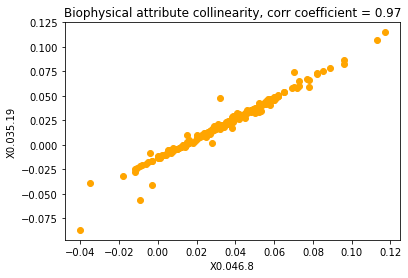

In [120]:
#Lets visualize these pairs using matplotlib

# Start with X0.046.8 with X0.035.19

#Create plot

plt.scatter(genes5408['X0.046.8'], genes5408['X0.035.19'], color = "orange")

# Add labels and title
plt.xlabel("X0.046.8")
plt.ylabel("X0.035.19")
plt.title('Biophysical attribute collinearity, corr coefficient = 0.97')

# Show the plot
plt.show()

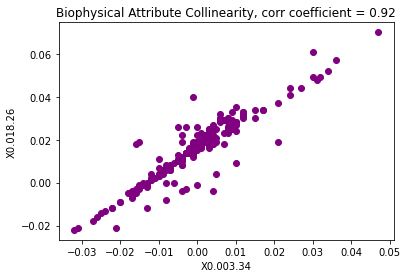

In [98]:
# Now visualzie X0.003.34 with X0.018.26

#Create plot

plt.scatter(genes5408['X0.003.34'], genes5408['X0.018.26'], color = 'purple')

# Add labels and title
plt.xlabel("X0.003.34")
plt.ylabel("X0.018.26")
plt.title('Biophysical Attribute Collinearity, corr coefficient = 0.92')

# Show the plot
plt.show()

NEXT VISUALIZE p53 response variable with the biophysical attribute X.0.012.6

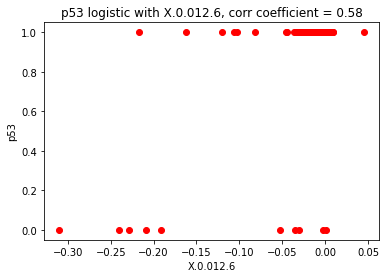

In [100]:

plt.scatter(genes5408['X.0.012.6'], genes5408['p53'], color = "red")

# Add labels and title
plt.xlabel("X.0.012.6")
plt.ylabel("p53")
plt.title('p53 logistic with X.0.012.6, corr coefficient = 0.58')

# Show the plot
plt.show()

Compare that with the high observation datasets

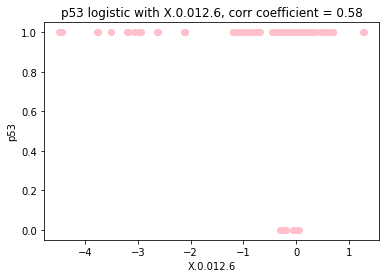

In [102]:
plt.scatter(bioAtt['X.0.012.6'], bioAtt['p53'], color = "pink")

# Add labels and title
plt.xlabel("X.0.012.6")
plt.ylabel("p53")
plt.title('p53 logistic with X.0.012.6, corr coefficient = 0.58')

# Show the plot
plt.show()

You can see how heavily the small dataset led to overfitting when compared to the dataset with more observations

Any correlation between p53 and biophysical attribute X.0.012.6 is most likely non-linear

VISUALIZE LDA MODEL USING MATPLOTLIB

In [108]:
Xlda = geneX
ylda = geney

# Split the data into training and testing sets
#Use a 80:20 split train:test
Xlda_train, Xlda_test, ylda_train, ylda_test = train_test_split(Xlda, ylda, test_size=0.2, random_state=42)

# Create an LDA model using sklearn import
lda1 = LinearDiscriminantAnalysis(n_components = 1)

# Fit the LDA model on the training data

lda1.fit(Xlda_train, ylda_train)

# Make predictions on the test data
ylda_pred = lda1.predict(Xlda_test)

# Evaluate the model's accuracy
accuracylda = accuracy_score(ylda_test, ylda_pred)
print("Accuracy:", accuracylda, "%")

Accuracy: 0.9230769230769231 %


In [109]:
print(classification_report(ylda_test, ylda_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.97      0.94      0.96        36

    accuracy                           0.92        39
   macro avg       0.74      0.81      0.76        39
weighted avg       0.94      0.92      0.93        39



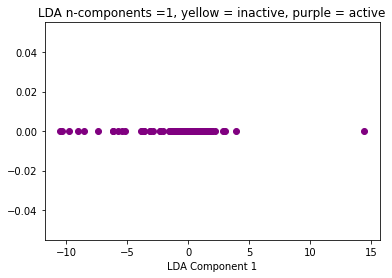

In [119]:
X_lda = lda1.transform(Xlda)

# Plot the transformed data
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, ]), color = "purple")
plt.xlabel('LDA Component 1')
plt.title('LDA n-components =1, yellow = inactive, purple = active')
plt.show()